<a href="https://colab.research.google.com/github/GinuraAdikari/BankChurn/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLcw/bank-additional-full.csv', sep=';')

# Display the first few rows
print(data.head())
print(data.info())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [63]:
# Check dataset shape
print("Shape of the dataset:", data.shape)

Shape of the dataset: (41188, 21)


In [64]:
# Summary statistics for numerical and categorical columns
print(data.describe())  # Numerical features

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [65]:
print(data.describe(include='object'))  # Categorical features

           job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  


In [66]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [67]:
# Check for missing values (including 'unknown')
print(data.isin(['unknown']).sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


y
no     36548
yes     4640
Name: count, dtype: int64


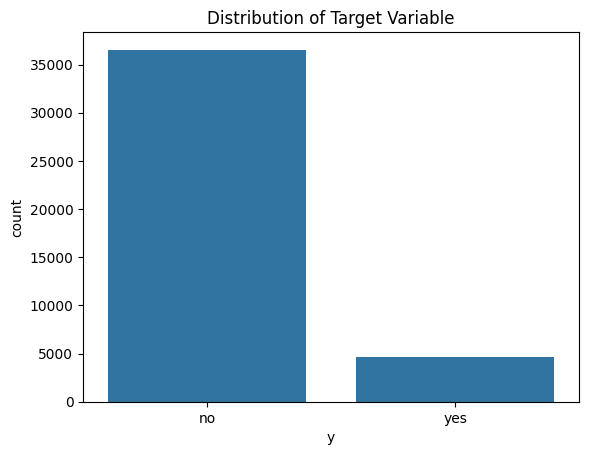

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable distribution
print(data['y'].value_counts())

# Plot the target variable distribution
sns.countplot(data=data, x='y')
plt.title("Distribution of Target Variable")
plt.show()


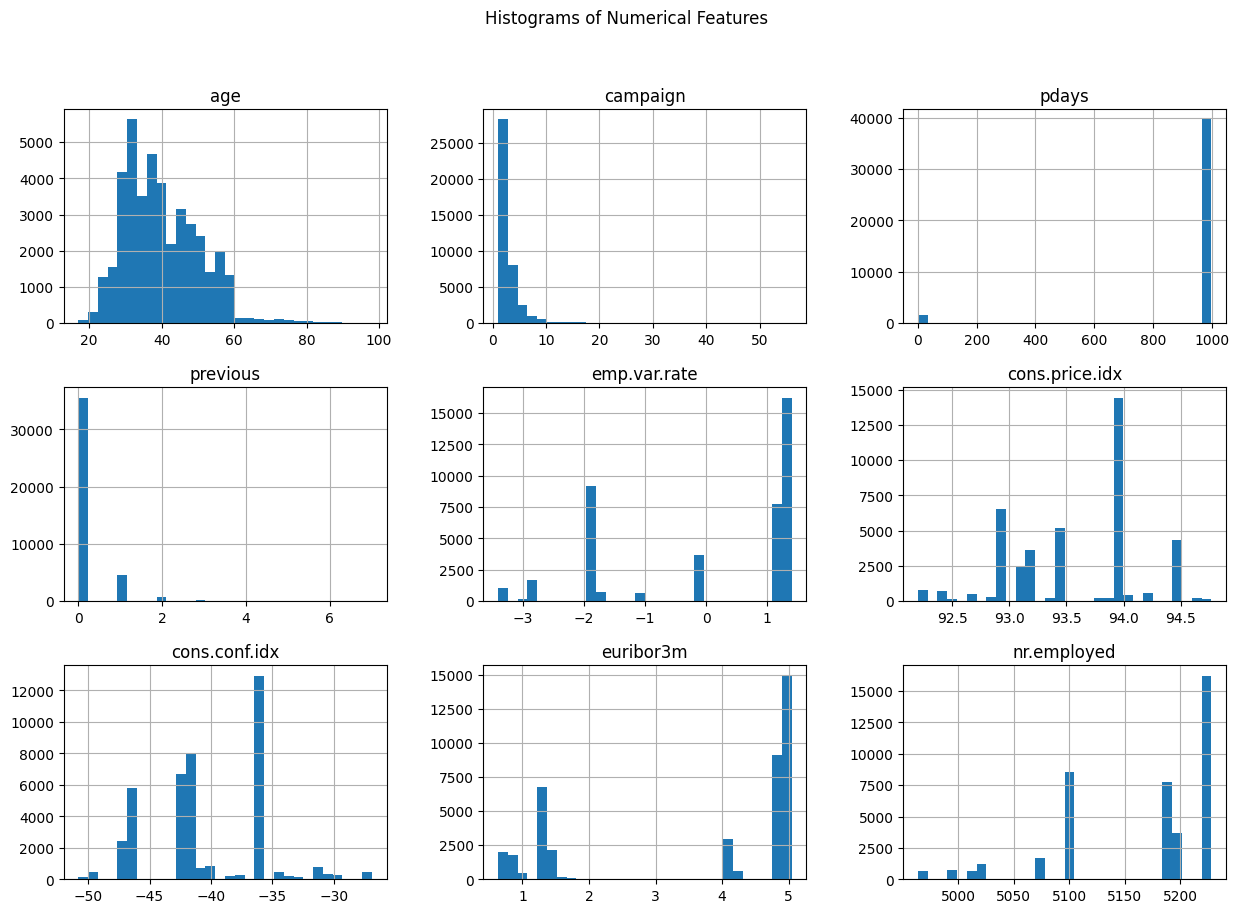

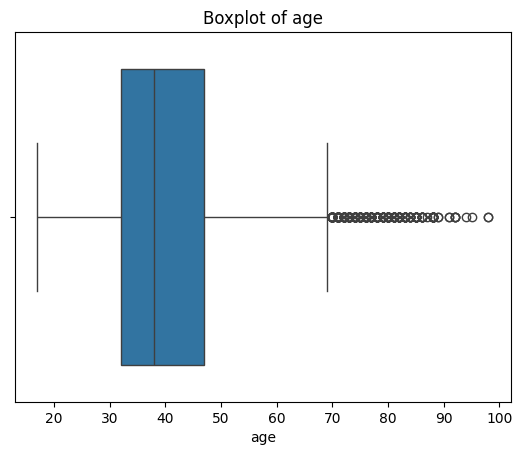

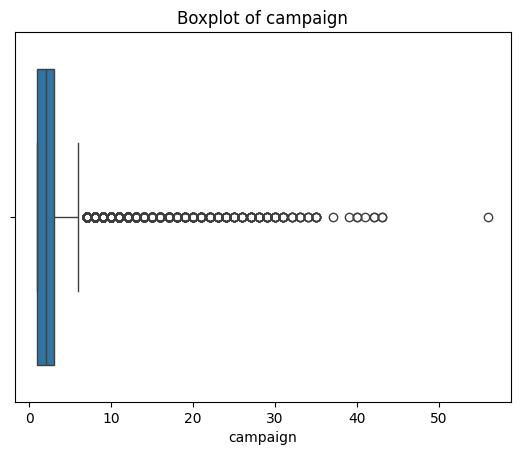

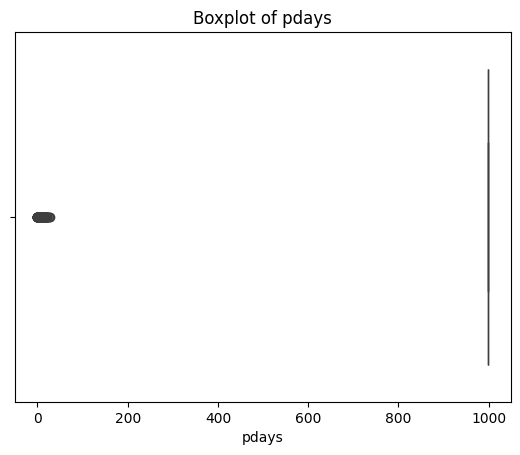

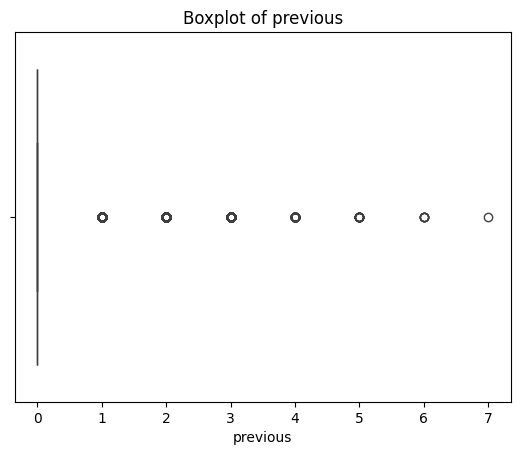

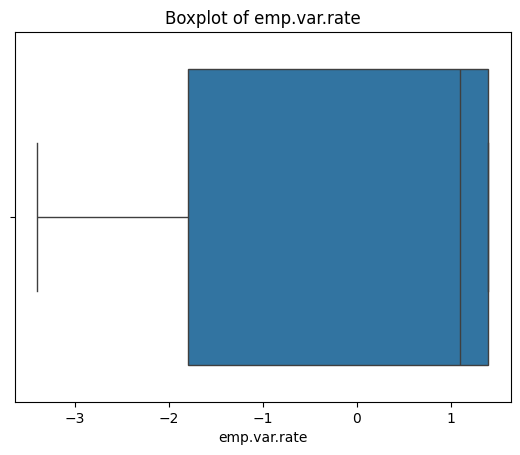

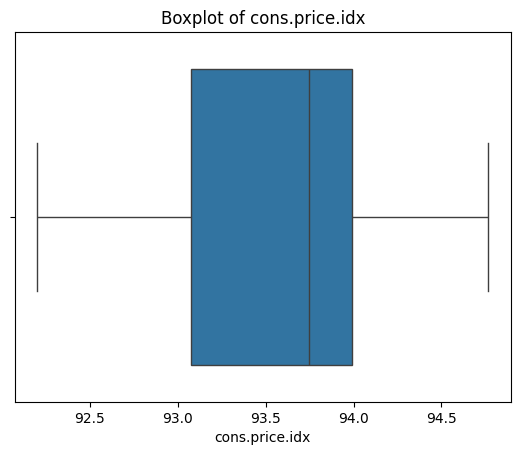

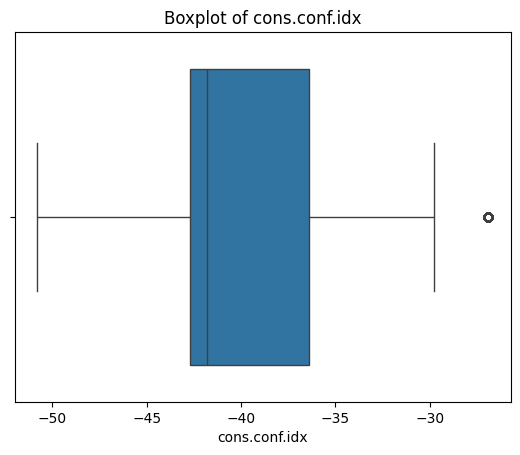

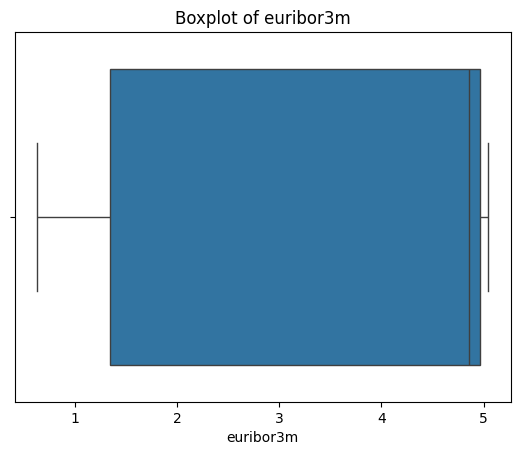

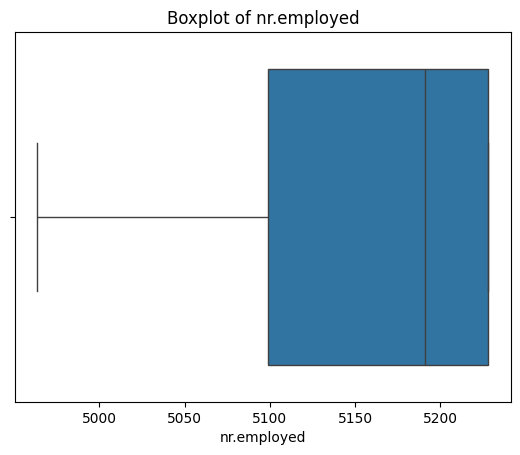

In [69]:
# List of numerical columns
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Histograms for numerical features
data[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots to detect outliers
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


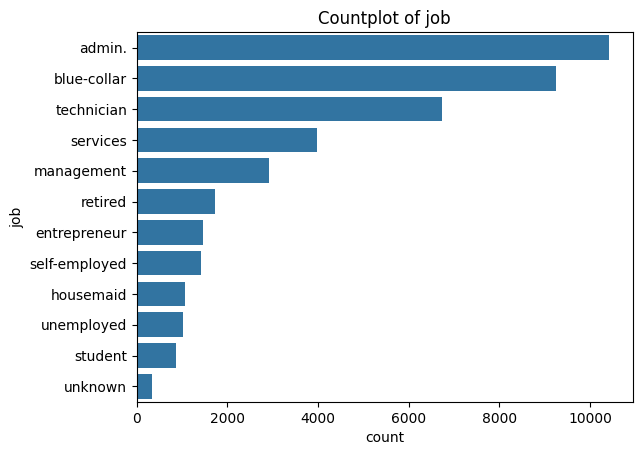

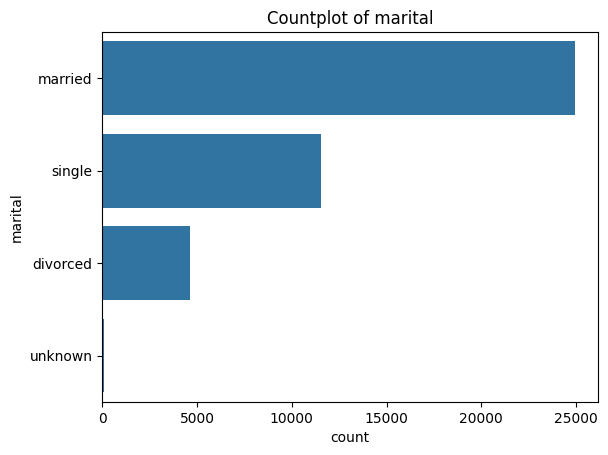

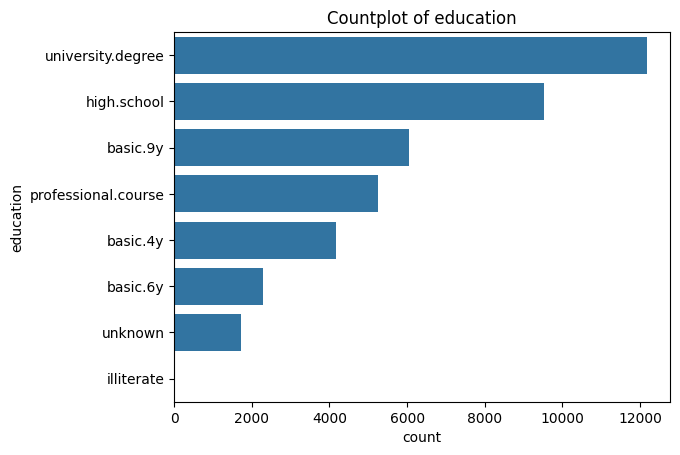

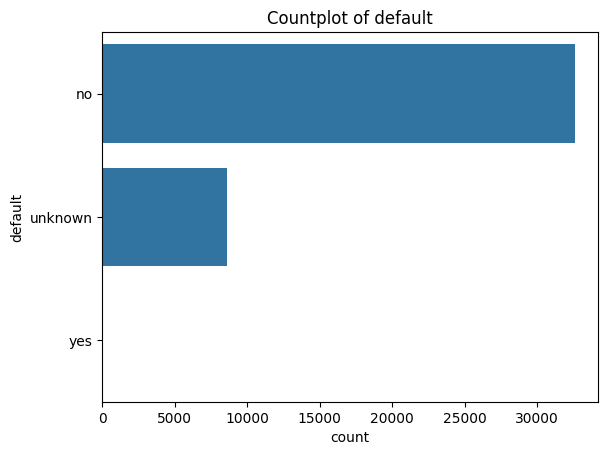

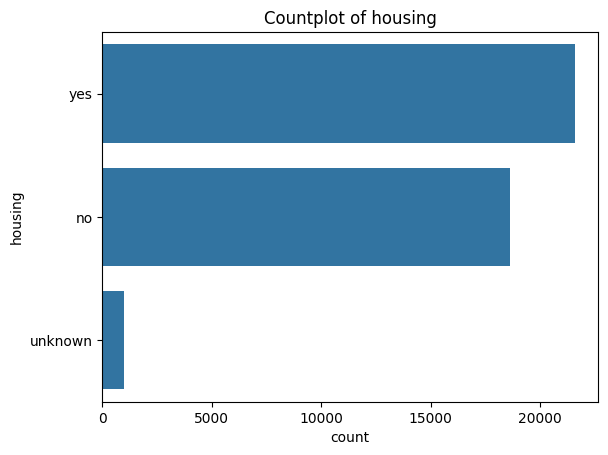

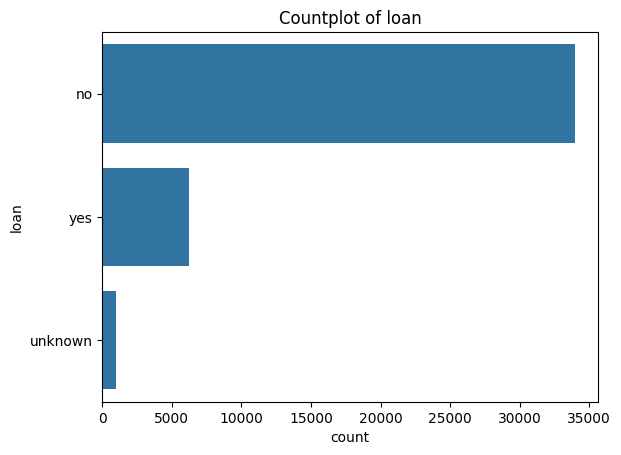

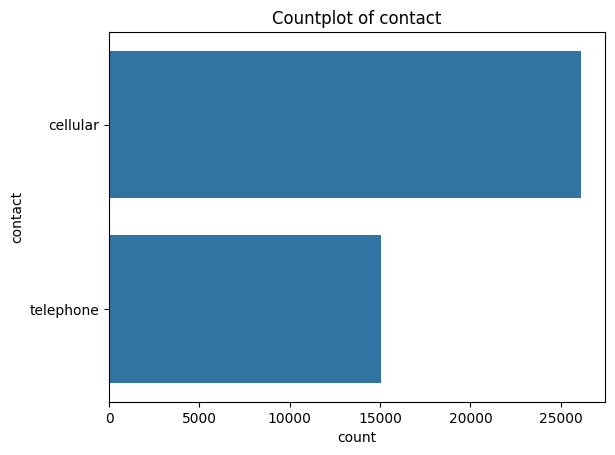

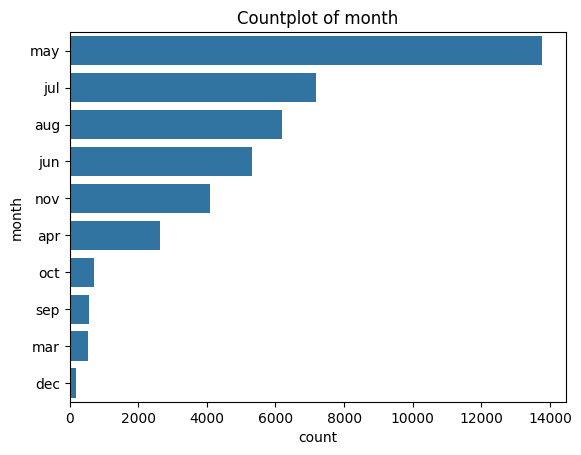

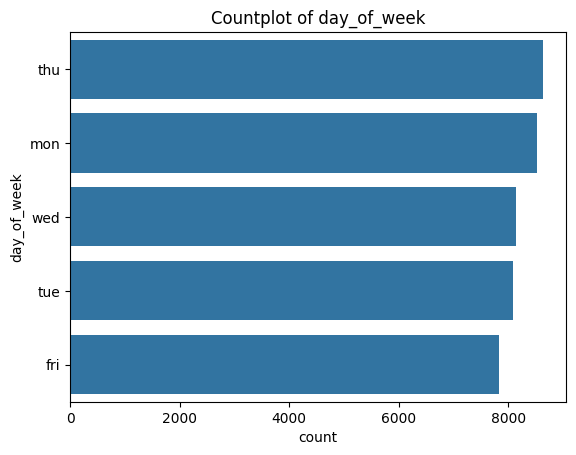

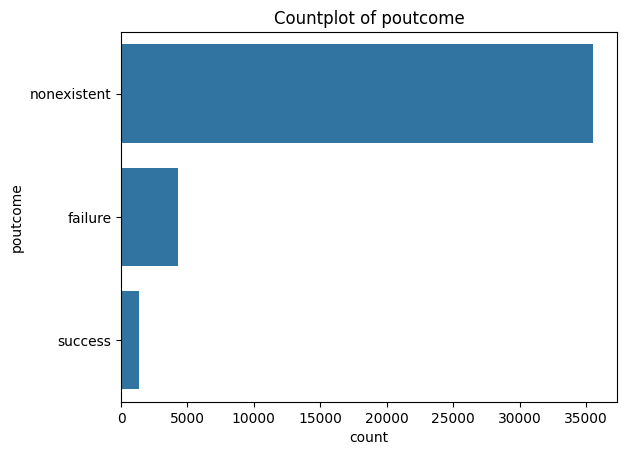

In [70]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Count plots for categorical features
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=data, y=col, order=data[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()


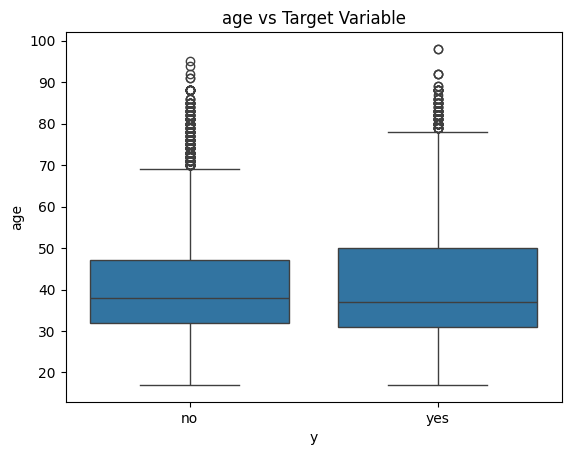

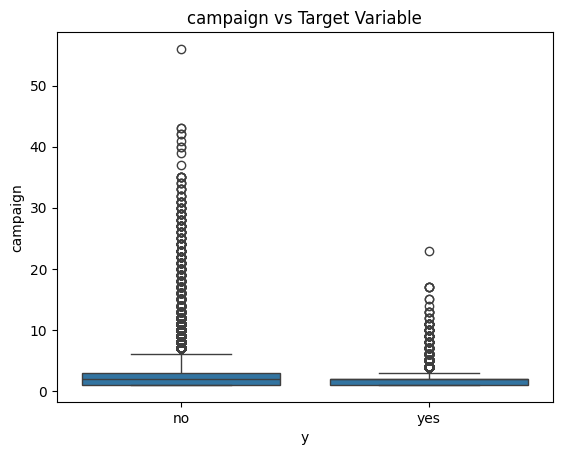

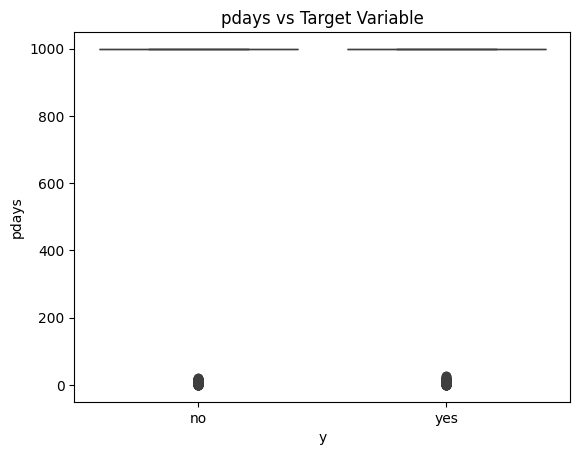

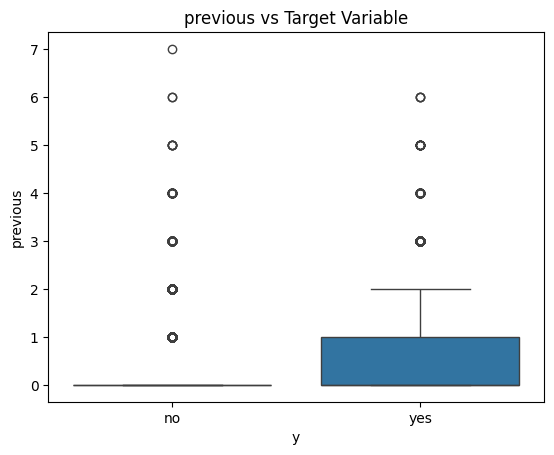

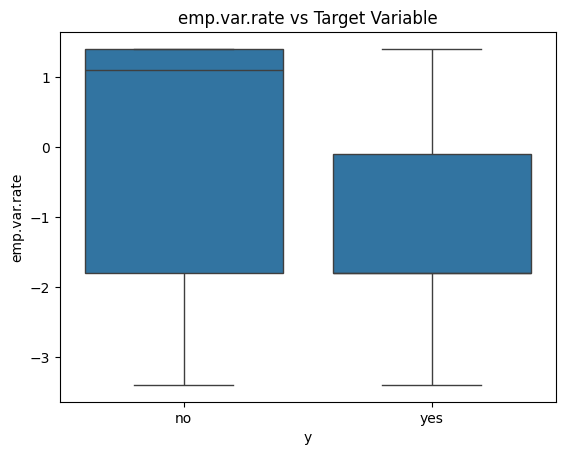

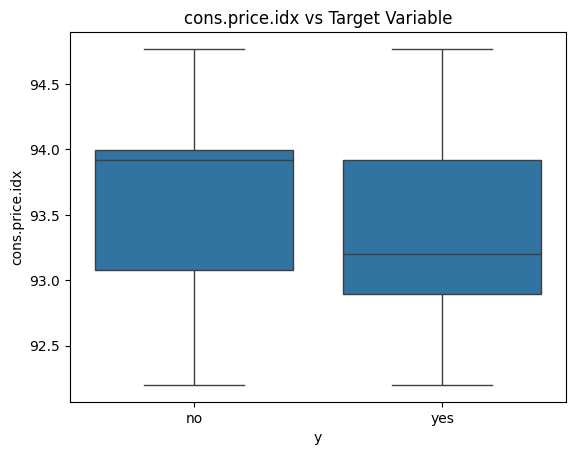

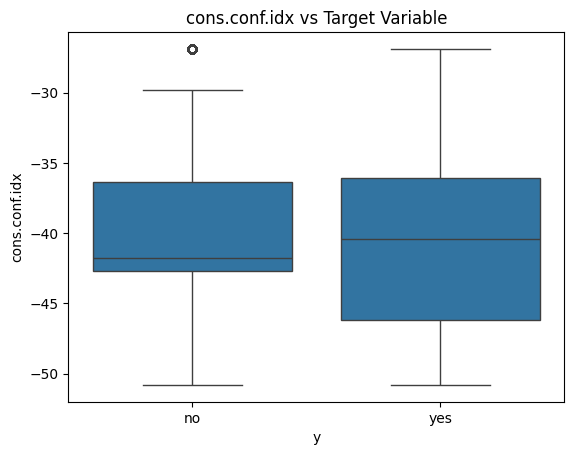

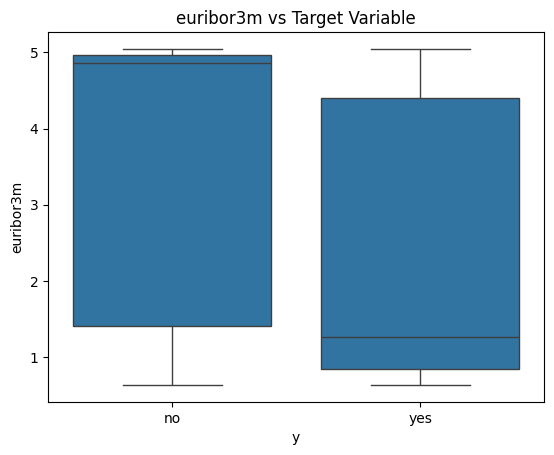

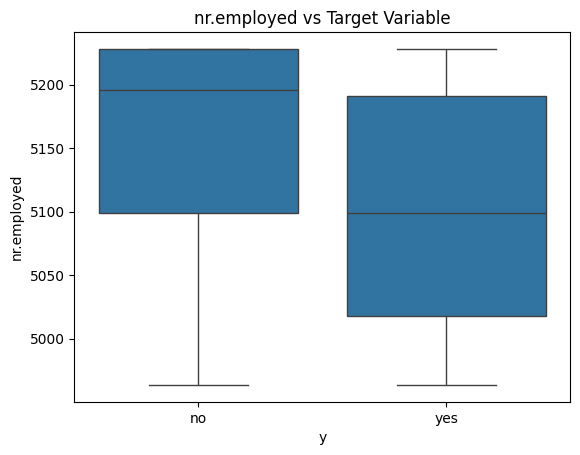

In [71]:
# Boxplots for numerical features vs target
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=data, x='y', y=col)
    plt.title(f"{col} vs Target Variable")
    plt.show()


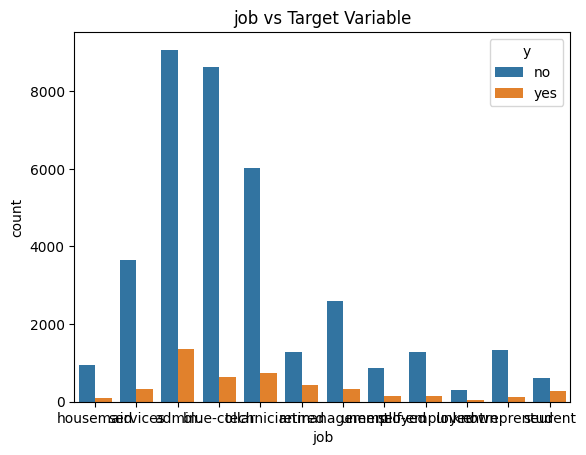

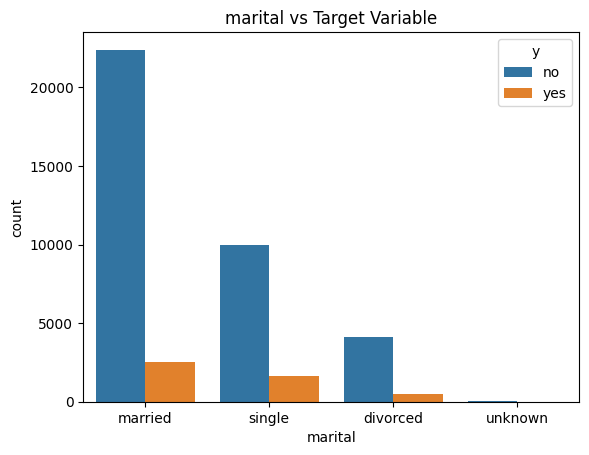

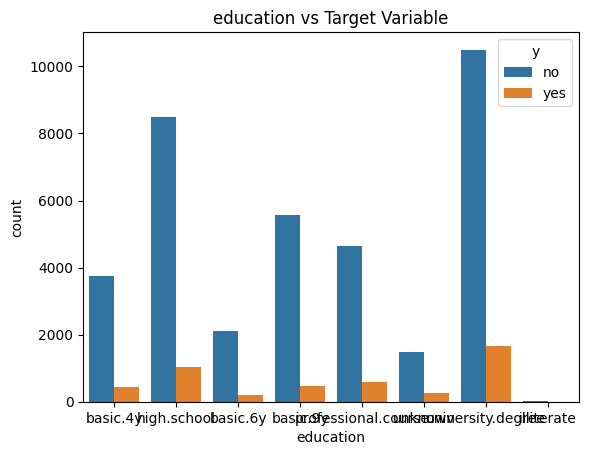

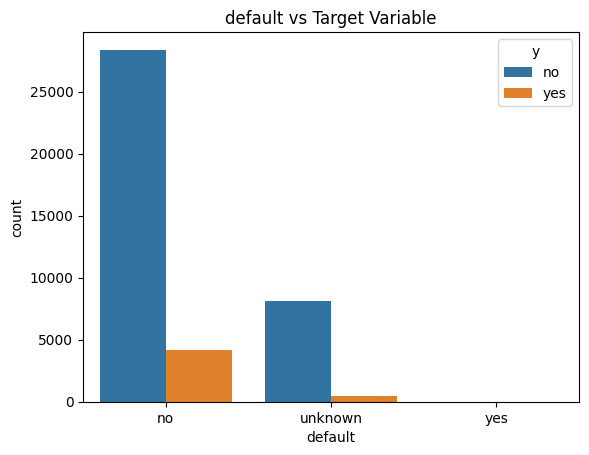

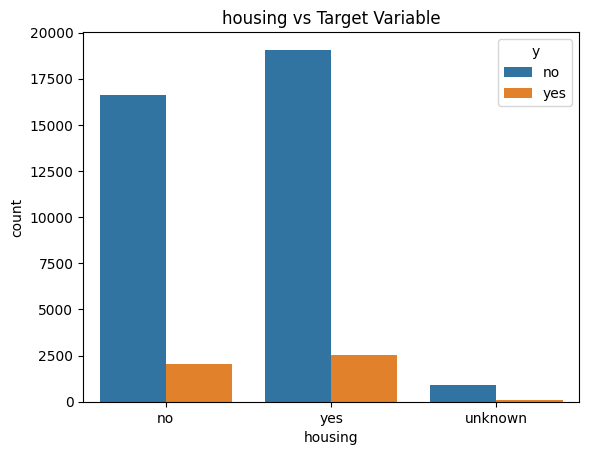

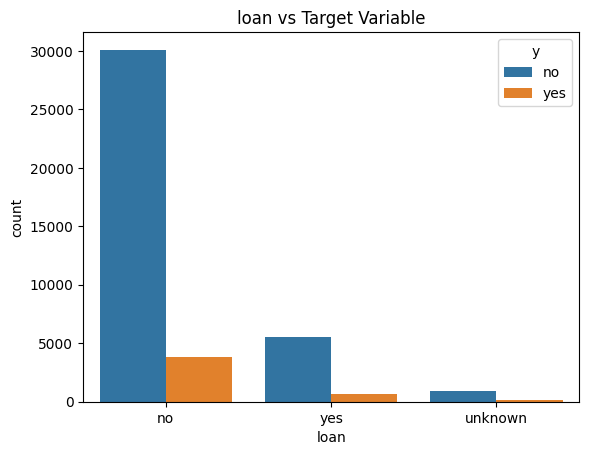

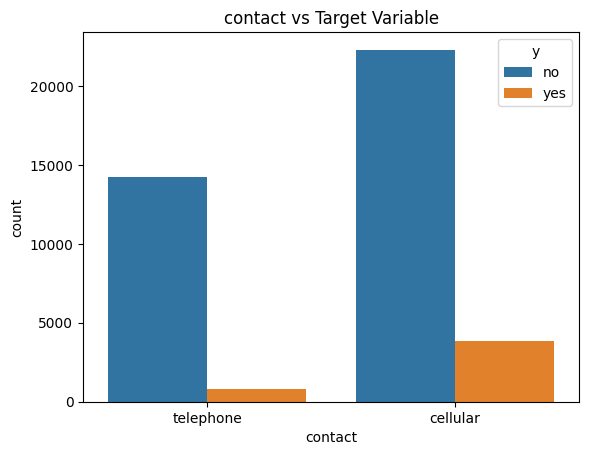

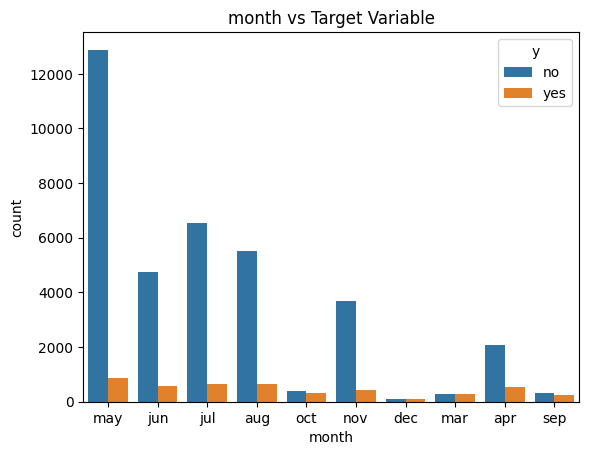

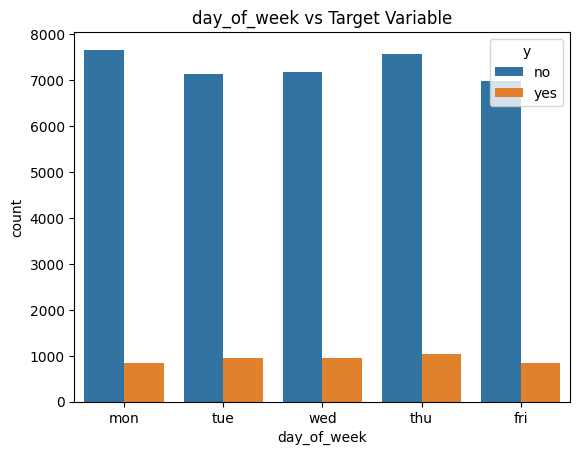

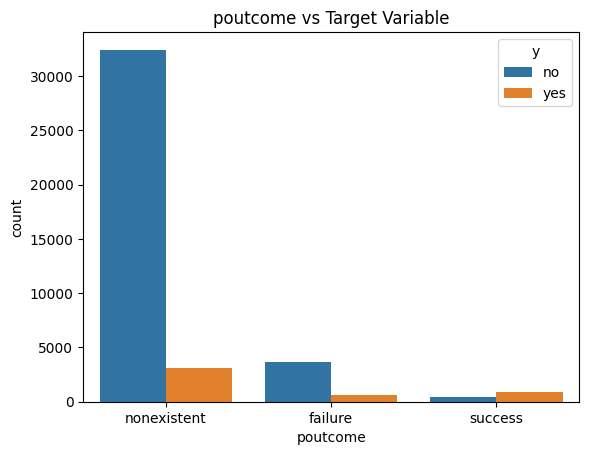

In [72]:
# Bar plots for categorical features vs target
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=data, x=col, hue='y')
    plt.title(f"{col} vs Target Variable")
    plt.show()


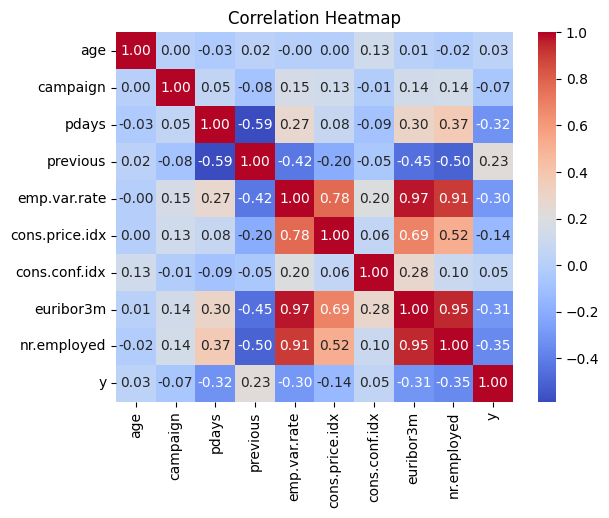

In [73]:
# Correlation heatmap
import numpy as np

# Convert 'y' column to numerical (1 for 'yes', 0 for 'no')
data['y'] = data['y'].map({'yes': 1, 'no': 0})

corr_matrix = data[numerical_columns + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [74]:
data = data.drop(columns=['duration'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [126]:
#data['previous_contacted'] = data['pdays'].apply(lambda x: 0 if x == 999 or x == -1 else 1)
data['pdays'] = data['pdays'].replace(-1, 999)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


In [127]:
data['pdays'].value_counts()

,count
pdays,
999,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [77]:
data['previous'].value_counts()

,count
previous,
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


In [78]:
data['poutcome'].value_counts()

,count
poutcome,
nonexistent,35563
failure,4252
success,1373


In [79]:
import pandas as pd

# Check for rows where pdays = -1 but previous is not 0
# These should indicate that the customer wasn't contacted before but has non-zero previous contact count
anomalies_pdays_previous = data[(data['pdays'] == -1) & (data['previous'] != 0)]

# Check for rows where previous = 0 but poutcome is not "nonexistent"
# These should indicate that the customer had no previous contacts but has an outcome registered
anomalies_previous_poutcome = data[(data['previous'] == 0) & (data['poutcome'] != 'nonexistent')]

# Check for rows where pdays = -1 but poutcome is not "nonexistent"
# These should indicate that the customer was not contacted before, but has a non-"nonexistent" outcome
anomalies_pdays_poutcome = data[(data['pdays'] == -1) & (data['poutcome'] != 'nonexistent')]

# Check for rows where pdays = -1, previous = 0, and poutcome = 'nonexistent'
# These should indicate that the customer has not been contacted before and has no outcome recorded
anomalies_pdays_previous_poutcome_nonexistent = data[(data['pdays'] == -1) & (data['previous'] == 0) & (data['poutcome'] == 'nonexistent')]

# Output results
print("Count of anomalies where pdays = -1 but previous != 0:")
print(len(anomalies_pdays_previous))

print("\nCount of anomalies where previous = 0 but poutcome != 'nonexistent':")
print(len(anomalies_previous_poutcome))

print("\nCount of anomalies where pdays = -1 but poutcome != 'nonexistent':")
print(len(anomalies_pdays_poutcome))

print("\nCount of anomalies where pdays = -1, previous = 0, and poutcome = 'nonexistent':")
print(len(anomalies_pdays_previous_poutcome_nonexistent))


Count of anomalies where pdays = -1 but previous != 0:
4110

Count of anomalies where previous = 0 but poutcome != 'nonexistent':
0

Count of anomalies where pdays = -1 but poutcome != 'nonexistent':
4110

Count of anomalies where pdays = -1, previous = 0, and poutcome = 'nonexistent':
35563


In [80]:
data['contact'].value_counts()

,count
contact,
cellular,26144
telephone,15044


In [81]:
# List of categorical columns to apply one-hot encoding to
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply one-hot encoding to the specified columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

# Check the resulting DataFrame
data_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
1,57,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
2,37,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
3,40,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
4,56,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False


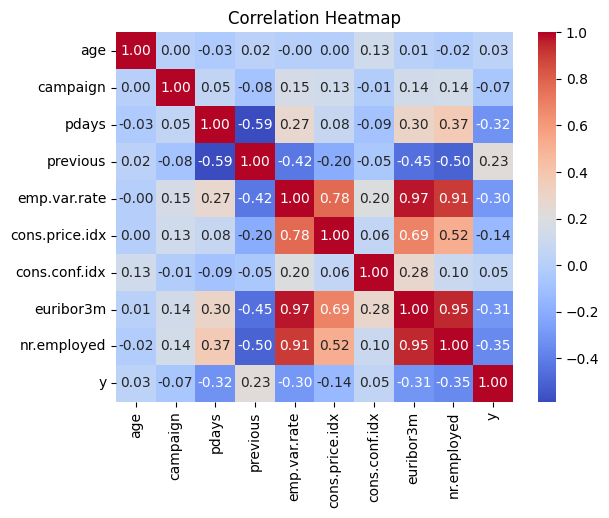

In [128]:
corr_matrix = data[numerical_columns + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])


In [83]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  previous_contacted             41188 non-null  int64  
 11  job_admin.                     41188 non-null  bool   
 12  job_blue-collar                41188 non-null 

In [139]:
from sklearn.decomposition import PCA

# Select the columns of interest for PCA
PCAfeatures = ['euribor3m', 'nr.employed', 'emp.var.rate']
data_selected = data_encoded[PCAfeatures]

pca = PCA(n_components=2)  # adjust the number
data_pca = pca.fit_transform(data_selected)

# Display the explained variance ratio for each component
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")

Explained variance ratio for each component: [0.96105523 0.03210655]


In [142]:
#add the PCA results to your original dataset
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

# Combine PCA components with the rest of your dataset
data_encoded = pd.concat([data_encoded.drop(columns=PCAfeatures), data_pca_df], axis=1)
data_encoded.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,previous_contacted,job_admin.,job_blue-collar,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,PC1,PC2
0,1.533034,-0.565922,-0.170834,-0.349494,0.722722,0.886447,0,0,False,False,...,False,True,False,False,False,False,True,False,0.979418,-0.251283
1,1.628993,-0.565922,-0.170834,-0.349494,0.722722,0.886447,0,0,False,False,...,False,True,False,False,False,False,True,False,0.979418,-0.251283
2,-0.290186,-0.565922,-0.170834,-0.349494,0.722722,0.886447,0,0,False,False,...,False,True,False,False,False,False,True,False,0.979418,-0.251283
3,-0.002309,-0.565922,-0.170834,-0.349494,0.722722,0.886447,0,0,True,False,...,False,True,False,False,False,False,True,False,0.979418,-0.251283
4,1.533034,-0.565922,-0.170834,-0.349494,0.722722,0.886447,0,0,False,False,...,False,True,False,False,False,False,True,False,0.979418,-0.251283


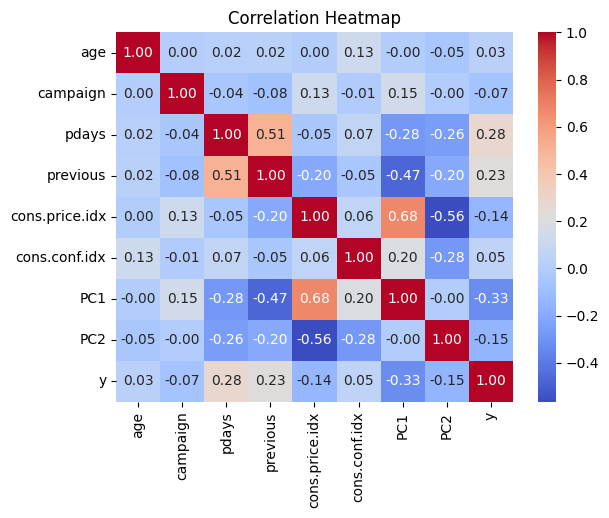

In [144]:
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'PC1',	'PC2']

corr_matrix = data_encoded[numerical_columns + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [145]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Select categorical columns (boolean in your case)
categorical_cols = data_encoded.select_dtypes(include=['bool']).columns

# Calculate MI scores
mi_scores = mutual_info_classif(data_encoded[categorical_cols], data_encoded['y'], discrete_features=True, random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': categorical_cols, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display the scores
print(mi_df)


                          Feature      MI Score
52               poutcome_success  2.897755e-02
51           poutcome_nonexistent  1.500116e-02
33               contact_cellular  1.164572e-02
34              contact_telephone  1.164572e-02
41                      month_may  6.382366e-03
40                      month_mar  6.366263e-03
43                      month_oct  6.083150e-03
24                     default_no  5.770454e-03
25                default_unknown  5.764265e-03
44                      month_sep  5.072745e-03
5                     job_retired  3.330078e-03
8                     job_student  3.189929e-03
1                 job_blue-collar  3.055643e-03
35                      month_apr  2.438661e-03
37                      month_dec  1.940052e-03
14                 marital_single  1.410695e-03
22    education_university.degree  1.227551e-03
18             education_basic.9y  1.108395e-03
13                marital_married  9.296428e-04
7                    job_services  5.658

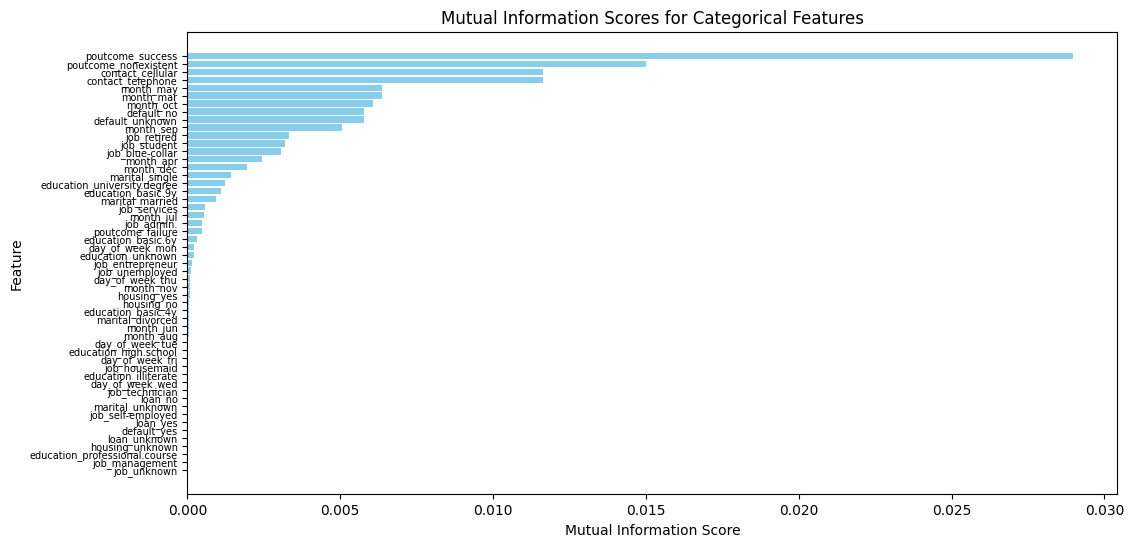

In [146]:
# Plot MI scores
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores for Categorical Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.tick_params(axis='y', labelsize=7)  # Added line to reduce y-axis tick label size
plt.show()

In [147]:
data['y'].value_counts()

,count
y,
0,36548
1,4640


In [156]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Define features and target
X = data_encoded.drop(columns=['y'])  # Features
y = data_encoded['y']                # Target variable

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class on the training data only
smote = SMOTE(sampling_strategy= 0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train the Random Forest Classifier with the best hyperparameters
rf_model_tuned = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    max_depth=30,
    max_features='log2',
    min_samples_leaf=6,
    min_samples_split=2,
    n_estimators=200
)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model_tuned, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")

# Fit the model on the entire resampled training set
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions
y_train_pred = rf_model_tuned.predict(X_train_resampled)

# Predictions on test set
y_test_pred = rf_model_tuned.predict(X_test)

# Step 5: Accuracy for training and test datasets
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-Validation Scores: [0.85068404 0.85420195 0.84677524 0.85876221 0.84988272]
Mean Cross-Validation Accuracy: 0.85
Training Accuracy: 0.89
Test Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.51      0.51      0.51      1392

    accuracy                           0.89     12357
   macro avg       0.73      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [53]:
y_train_resampled.value_counts()

,count
y,
0,25583
1,25583


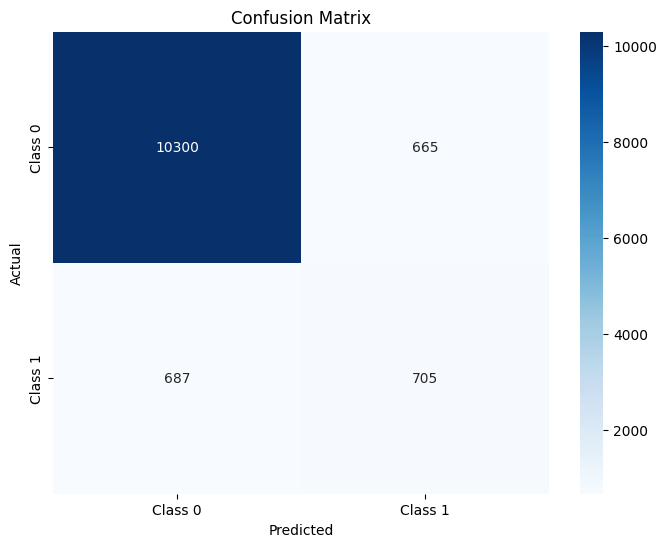

In [157]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [154]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Score: {pr_auc:.2f}")


ROC-AUC Score: 0.75
PR-AUC Score: 0.55


In [158]:

# Extract the values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Class-wise accuracy calculation
accuracy_0 = tp / (tp + fn)  # Accuracy for class 0
accuracy_1 = tn / (tn + fp)  # Accuracy for class 1

print(f"Class 0 Accuracy: {accuracy_0:.4f}")
print(f"Class 1 Accuracy: {accuracy_1:.4f}")

Class 0 Accuracy: 0.5065
Class 1 Accuracy: 0.9394


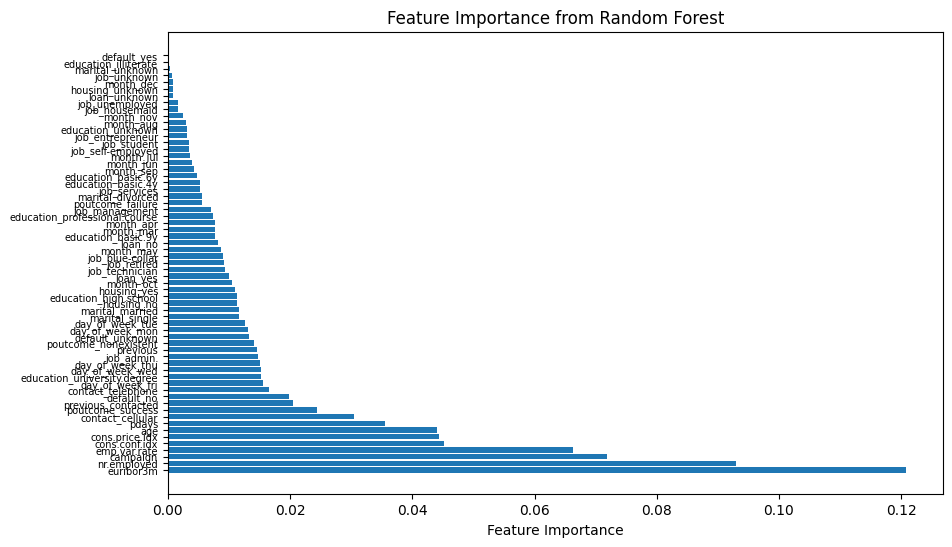

In [135]:
import matplotlib.pyplot as plt

# Get the feature importances from the trained Random Forest model
feature_importances = rf_model_tuned.feature_importances_

# Create a DataFrame to display features and their importance
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.tick_params(axis='y', labelsize=7)
plt.show()


In [136]:
# Print the feature importance table
feature_importance_df.head(50)

,Feature,Importance
7,euribor3m,0.120772
8,nr.employed,0.093044
1,campaign,0.071785
4,emp.var.rate,0.066278
6,cons.conf.idx,0.045201
5,cons.price.idx,0.044394
0,age,0.044046
2,pdays,0.035459
43,contact_cellular,0.030507
62,poutcome_success,0.024340
